# **Import And Seeding**

In [1]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import random
import math
import copy
import cv2

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, Callback
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.applications.xception import preprocess_input, decode_predictions
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers.experimental.preprocessing import RandomFlip, RandomRotation

from keras import backend as K
from sklearn.metrics import classification_report, confusion_matrix

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [2]:
def seed_everything(seed):
    os.environ["PYTHONHASHSEED"] = str(seed)
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)

seed_everything(50)

In [3]:
tf. __version__

'2.12.0'

# **Data Splitting**

In [4]:
# dataset_dir = "C:\\Users\\Asus\\Downloads\\Pattern\\Dataset\\"
# train_dir =   "C:\\Users\\Asus\\Downloads\\Pattern\\Dataset\\Train\\"
# test_dir =    "C:\\Users\\Asus\\Downloads\\Pattern\\Dataset\\Test\\"
# val_dir =     "C:\\Users\\Asus\\Downloads\\Pattern\\Dataset\\Validation\\"

In [5]:
# folder_names = [
#     "Corn___Common_Rust", "Corn___Gray_Leaf_Spot", "Corn___Healthy", "Corn___Northern_Leaf_Blight",
#     "Potato___Early_Blight", "Potato___Healthy", "Potato___Late_Blight",
#     "Rice___Brown_Spot", "Rice___Healthy", "Rice___Leaf_Blast", "Rice___Neck_Blast",
#     "Wheat___Brown_Rust", "Wheat___Healthy", "Wheat___Yellow_Rust"
# ]

In [6]:
# for i, folder_name in enumerate(folder_names):
#     old_folder_path = os.path.join(dataset_dir, folder_name)
#     new_folder_name = str(i)
#     new_folder_path = os.path.join(dataset_dir, new_folder_name)
    
#     os.rename(old_folder_path, new_folder_path)
#     print(f"Renamed '{folder_name}' to '{new_folder_name}'")

# print("Folder renaming completed.")

In [7]:
# os.makedirs(train_dir, exist_ok=True)
# os.makedirs(test_dir, exist_ok=True)
# os.makedirs(val_dir, exist_ok=True)

In [8]:
# folder_names = [
#     "0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12", "13"
# ]

In [9]:
# train_ratio = 0.7
# test_ratio = 0.2
# val_ratio = 0.1 

In [10]:
# for folder_name in folder_names:
#     folder_path = os.path.join(dataset_dir, folder_name)
#     images = os.listdir(folder_path)
#     random.shuffle(images) 

#     total_images = len(images)
#     train_count = int(total_images * train_ratio)
#     test_count = int(total_images * test_ratio)
#     val_count = total_images - train_count - test_count

#     train_images = images[:train_count]
#     test_images = images[train_count:train_count + test_count]
#     val_images = images[train_count + test_count:]


#     for image_name in train_images:
#         src_path = os.path.join(folder_path, image_name)
#         dst_path = os.path.join(train_dir, folder_name, image_name)
#         os.makedirs(os.path.dirname(dst_path), exist_ok=True)
#         shutil.copy(src_path, dst_path)

#     for image_name in test_images:
#         src_path = os.path.join(folder_path, image_name)
#         dst_path = os.path.join(test_dir, folder_name, image_name)
#         os.makedirs(os.path.dirname(dst_path), exist_ok=True)
#         shutil.copy(src_path, dst_path)

#     for image_name in val_images:
#         src_path = os.path.join(folder_path, image_name)
#         dst_path = os.path.join(val_dir, folder_name, image_name)
#         os.makedirs(os.path.dirname(dst_path), exist_ok=True)
#         shutil.copy(src_path, dst_path)

# print("Dataset splitting completed.")

# **Exploratory data analysis (EDA)**

In [4]:
train_dir = "/kaggle/input/bangladeshi-crop-disease-dataset/Dataset/Train"
test_dir = "/kaggle/input/bangladeshi-crop-disease-dataset/Dataset/Test"
validation_dir ="/kaggle/input/bangladeshi-crop-disease-dataset/Dataset/Validation"

In [12]:
train_data = []

for class_name in os.listdir(train_dir):
    class_path = os.path.join(train_dir, class_name)
    for file_name in os.listdir(class_path):
        file_path = os.path.join(class_path, file_name)
        train_data.append((file_path, class_name))

In [13]:
train_df = pd.DataFrame(train_data, columns=['File_Path', 'Class_Name'])
train_df

File_Path Class_Name
0     /kaggle/input/bangladeshi-crop-disease-dataset...          7
1     /kaggle/input/bangladeshi-crop-disease-dataset...          7
2     /kaggle/input/bangladeshi-crop-disease-dataset...          7
3     /kaggle/input/bangladeshi-crop-disease-dataset...          7
4     /kaggle/input/bangladeshi-crop-disease-dataset...          7
...                                                 ...        ...
9107  /kaggle/input/bangladeshi-crop-disease-dataset...         11
9108  /kaggle/input/bangladeshi-crop-disease-dataset...         11
9109  /kaggle/input/bangladeshi-crop-disease-dataset...         11
9110  /kaggle/input/bangladeshi-crop-disease-dataset...         11
9111  /kaggle/input/bangladeshi-crop-disease-dataset...         11

[9112 rows x 2 columns]

In [14]:
train_df['Class_Name'].value_counts().sort_index()

0      834
1      359
10     700
11     631
12     781
13     646
2      813
3      689
4      700
5      106
6      700
7      429
8     1041
9      683
Name: Class_Name, dtype: int64

In [15]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip("horizontal"),
  tf.keras.layers.RandomRotation(0.2),
  tf.keras.layers.RandomZoom(0.2),
  tf.keras.layers.RandomHeight(0.2),
  tf.keras.layers.RandomWidth(0.2),
])

In [16]:
train_df['File_Path'][0]

'/kaggle/input/bangladeshi-crop-disease-dataset/Dataset/Train/7/bs_wb_10.jpg'

In [17]:
category = ['Corn Common Rust','Corn Gray Leaf','Corn Healthy','Corn Northern Leaf Blight','Potato Early Blight','Potato Healthy','Potato Late Blight','Rice Brown Spot','Rice Healthy','Rice Leaf Blast','Rice Neck Blast','Wheat Brown Rust','Wheat Healthy','Wheat Yellow Rust']
count = [1192, 513, 1162, 985,1000, 152, 1000, 613, 1488, 977, 1000, 902, 1116, 924]

In [18]:
crop_df = pd.DataFrame({'Category': ['Corn Common Rust','Corn Gray Leaf','Corn Healthy','Corn Northern Leaf Blight','Potato Early Blight','Potato Healthy','Potato Late Blight','Rice Brown Spot','Rice Healthy','Rice Leaf Blast','Rice Neck Blast','Wheat Brown Rust','Wheat Healthy','Wheat Yellow Rust'],
                   'total_image': [1192, 513, 1162, 985,1000, 152, 1000, 613, 1488, 977, 1000, 902, 1116, 924]})
crop_df.set_index('Category', inplace=True)
crop_df

total_image
Category                              
Corn Common Rust                  1192
Corn Gray Leaf                     513
Corn Healthy                      1162
Corn Northern Leaf Blight          985
Potato Early Blight               1000
Potato Healthy                     152
Potato Late Blight                1000
Rice Brown Spot                    613
Rice Healthy                      1488
Rice Leaf Blast                    977
Rice Neck Blast                   1000
Wheat Brown Rust                   902
Wheat Healthy                     1116
Wheat Yellow Rust                  924

<Axes: title={'center': 'Image Distribution for Class Labels'}, ylabel='total_image'>

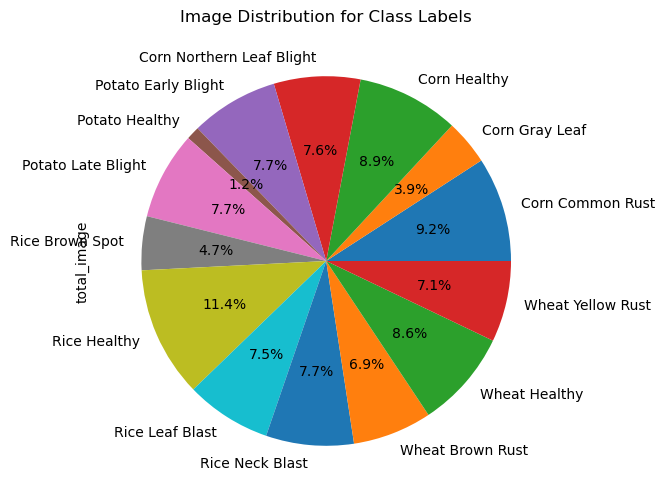

In [19]:
fig = plt.figure(figsize=(6,6))
ax = plt.subplot(111)
crop_df.total_image.plot(kind='pie', ax=ax, startangle=0, fontsize=10, autopct='%1.1f%%', title='Image Distribution for Class Labels')

In [22]:
plant_df = pd.DataFrame({'Plants': ['Corn','Potato','Rice','Wheat'],
                   'total_image': [3852, 2152, 4078, 2942]})
plant_df.set_index('Plants', inplace=True)
plant_df

total_image
Plants             
Corn           3852
Potato         2152
Rice           4078
Wheat          2942

<Axes: title={'center': '% per plants'}, ylabel='total_image'>

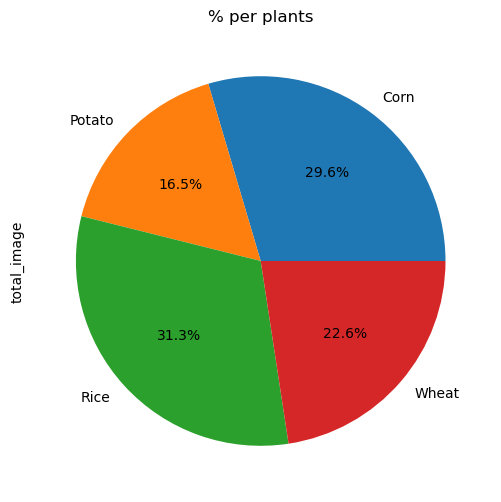

In [23]:
fig = plt.figure(figsize=(6,6))
ax = plt.subplot(111)
plant_df.total_image.plot(kind='pie', ax=ax, startangle=0, fontsize=10, autopct='%1.1f%%', title='% per plants')

In [24]:
img_width, img_height = 299, 299

# **CORN**

In [25]:
EDA_class_names = ['Corn Common Rust', 'Corn Gray Leaf Spot', 'Corn Healthy', 'Corn Northern Leaf Blight']

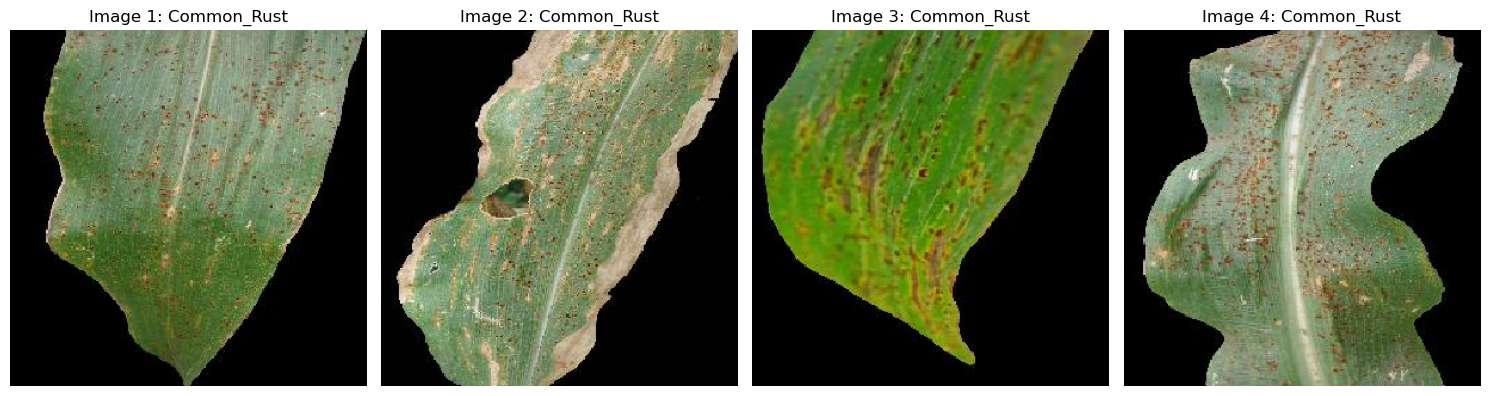

In [26]:
desired_class = "0"
name = "Common_Rust"

desired_class_df = train_df[train_df['Class_Name'] == desired_class]

num_images_to_plot = 4
    
fig, axes = plt.subplots(1, num_images_to_plot, figsize=(15, 5))

for i, (index, row) in enumerate(desired_class_df.head(num_images_to_plot).iterrows()):
    image_path = row['File_Path']
    image = load_img(image_path, target_size=(img_width, img_height))
    
    axes[i].imshow(image)
    axes[i].set_title(f"Image {i+1}: {name}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

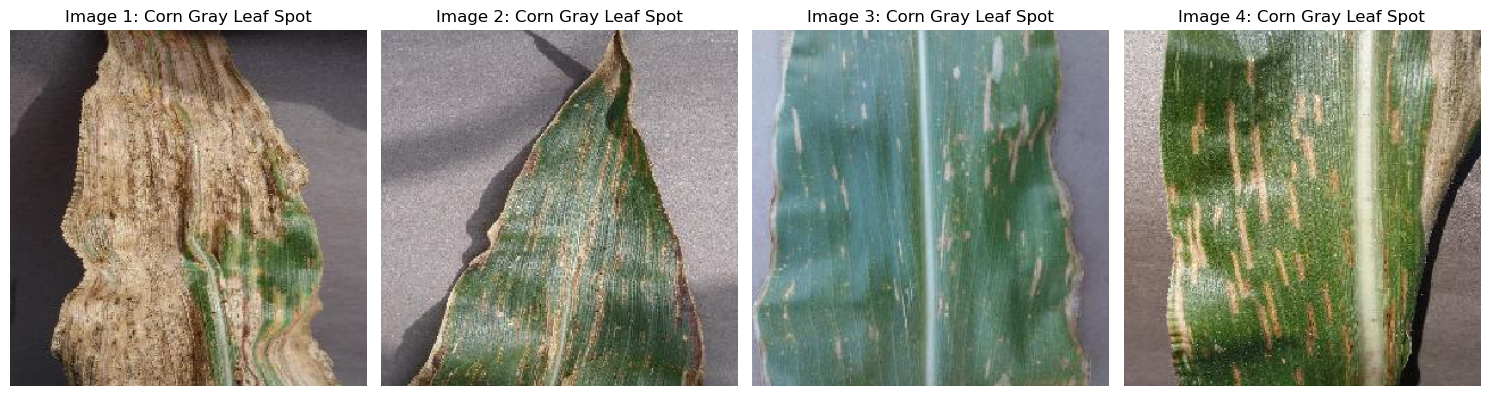

In [27]:
desired_class = "1"
name = "Corn Gray Leaf Spot"

desired_class_df = train_df[train_df['Class_Name'] == desired_class]

num_images_to_plot = 4
    
fig, axes = plt.subplots(1, num_images_to_plot, figsize=(15, 5))

for i, (index, row) in enumerate(desired_class_df.head(num_images_to_plot).iterrows()):
    image_path = row['File_Path']
    image = load_img(image_path, target_size=(img_width, img_height))
    
    axes[i].imshow(image)
    axes[i].set_title(f"Image {i+1}: {name}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

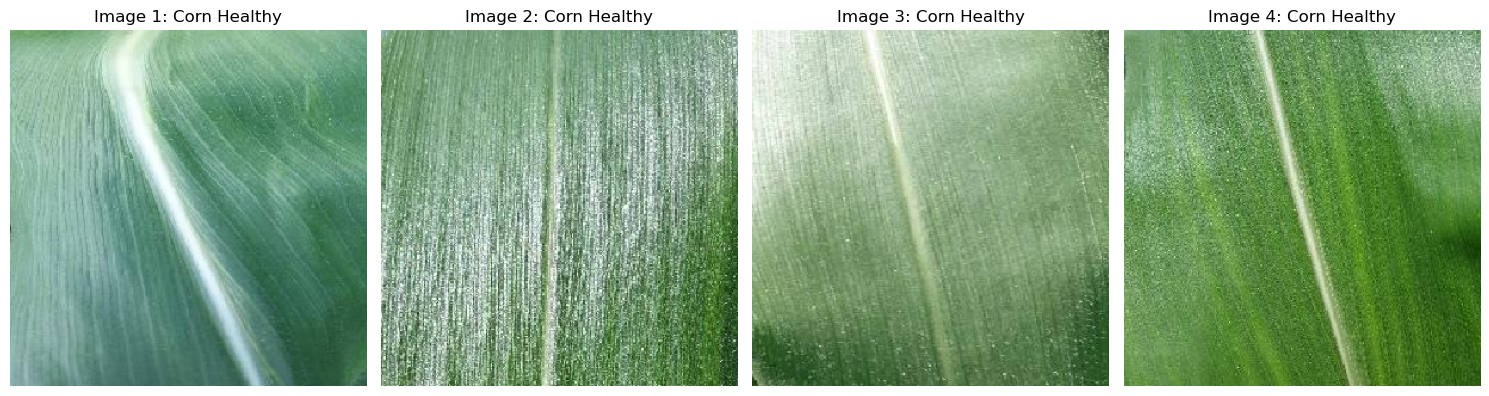

In [28]:
desired_class = "2"
name = "Corn Healthy"

desired_class_df = train_df[train_df['Class_Name'] == desired_class]

num_images_to_plot = 4
    
fig, axes = plt.subplots(1, num_images_to_plot, figsize=(15, 5))

for i, (index, row) in enumerate(desired_class_df.head(num_images_to_plot).iterrows()):
    image_path = row['File_Path']
    image = load_img(image_path, target_size=(img_width, img_height))
    
    axes[i].imshow(image)
    axes[i].set_title(f"Image {i+1}: {name}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

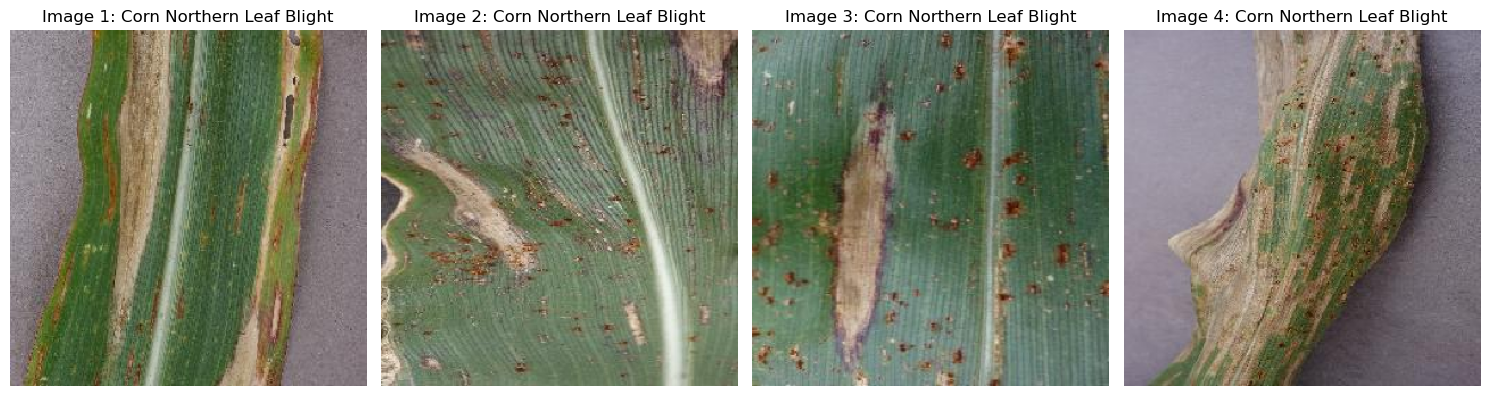

In [29]:
desired_class = "3"
name = "Corn Northern Leaf Blight"

desired_class_df = train_df[train_df['Class_Name'] == desired_class]

num_images_to_plot = 4
    
fig, axes = plt.subplots(1, num_images_to_plot, figsize=(15, 5))

for i, (index, row) in enumerate(desired_class_df.head(num_images_to_plot).iterrows()):
    image_path = row['File_Path']
    image = load_img(image_path, target_size=(img_width, img_height))
    
    axes[i].imshow(image)
    axes[i].set_title(f"Image {i+1}: {name}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

# **Model**

In [5]:
opt = tf.keras.optimizers.Adam(learning_rate=1e-4)
loss = 'categorical_crossentropy'
metrics = ['accuracy']

batch_size = 32

# **Xception-Model**

In [32]:
model1 = Xception(include_top=False,input_shape=(299, 299, 3), weights='imagenet')

83683744/83683744 [==============================] - 0s 0us/step


In [12]:
input_shape= (299, 299)

In [13]:
datagen_train = ImageDataGenerator(rescale=1./255,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  vertical_flip=False)


datagen_test = ImageDataGenerator(rescale=1./255)
datagen_val = ImageDataGenerator(rescale=1./255)


generator_train = datagen_train.flow_from_directory(directory=train_dir,
                                                    target_size=input_shape,
                                                    batch_size=batch_size,
                                                    shuffle=True)

generator_test = datagen_test.flow_from_directory(directory=test_dir,
                                                  target_size=input_shape,
                                                  batch_size=batch_size,
                                                  shuffle=False)

generator_val = datagen_val.flow_from_directory(directory=validation_dir,
                                                  target_size=input_shape,
                                                  batch_size=batch_size,
                                                  shuffle=False)


Found 9112 images belonging to 14 classes.
Found 2600 images belonging to 14 classes.
Found 1312 images belonging to 14 classes.


In [36]:
math.ceil(generator_train.samples)

9112

In [37]:
next(generator_train)[1]

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0

In [38]:
conv_model = Model(inputs=model1.input, outputs=model1.output)

In [39]:
new_model = Sequential()
new_model.add(conv_model)
new_model.add(Flatten())
new_model.add(Dropout(0.5))
new_model.add(Dense(512, activation='relu'))
new_model.add(Dense(14, activation='softmax'))

In [40]:
new_model.compile(optimizer= opt, loss=loss, metrics=metrics)

In [41]:
num_iters = 30000
num_batches_train = generator_train.n // batch_size

epochs = int(num_iters / num_batches_train)
print("Epoch: ",epochs)
desired_train_accuracy = 0.99

steps_per_epoch = generator_train.n // batch_size
steps_val = generator_val.n // batch_size
print("Steps_per_epoch: ",steps_per_epoch)
print("Steps_val: ",steps_val)

Epoch:  105
Steps_per_epoch:  284
Steps_val:  41


In [42]:
Checkpoint = ModelCheckpoint("Xception.hdf5", monitor="val_accuracy", save_best_only=True, mode="max")
EarlyStop = EarlyStopping(monitor="accuracy", baseline=desired_train_accuracy, patience=10, restore_best_weights=True, mode="auto")

history = new_model.fit_generator(generator=generator_train,
                                  epochs=epochs,
                                  callbacks=[Checkpoint, EarlyStop],
                                  steps_per_epoch=steps_per_epoch,
                                  validation_data=generator_val,
                                  validation_steps=steps_val)


/tmp/ipykernel_28/3741891571.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = new_model.fit_generator(generator=generator_train,


Epoch 1/105
284/284 [==============================] - 425s 1s/step - loss: 0.4370 - accuracy: 0.8618 - val_loss: 0.1895 - val_accuracy: 0.9337
Epoch 2/105
284/284 [==============================] - 308s 1s/step - loss: 0.1662 - accuracy: 0.9420 - val_loss: 0.1568 - val_accuracy: 0.9459
Epoch 3/105
284/284 [==============================] - 319s 1s/step - loss: 0.1153 - accuracy: 0.9611 - val_loss: 0.1487 - val_accuracy: 0.9505
Epoch 4/105
284/284 [==============================] - 303s 1s/step - loss: 0.1004 - accuracy: 0.9688 - val_loss: 0.1425 - val_accuracy: 0.9588
Epoch 5/105
284/284 [==============================] - 303s 1s/step - loss: 0.0841 - accuracy: 0.9726 - val_loss: 0.1462 - val_accuracy: 0.9634
Epoch 6/105
284/284 [==============================] - 305s 1s/step - loss: 0.0768 - accuracy: 0.9753 - val_loss: 0.2327 - val_accuracy: 0.9505
Epoch 7/105
284/284 [==============================] - 298s 1s/step - loss: 0.0699 - accuracy: 0.9787 - val_loss: 0.1664 - val_accuracy:

In [18]:
model_path = "/kaggle/input/xception-model/Models/Xception.hdf5"

In [19]:
new_model=tf.keras.models.load_model(model_path)

In [20]:
Y_pred = new_model.predict(generator_test)
y_pred = np.argmax(Y_pred, axis=1)

82/82 [==============================] - 27s 322ms/step


In [21]:
class_labels = list(generator_test.class_indices.keys())

In [22]:
print(classification_report(generator_test.classes, y_pred, target_names=class_labels))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       238
           1       0.84      0.96      0.89       102
          10       1.00      1.00      1.00       200
          11       0.99      0.97      0.98       180
          12       0.99      1.00      0.99       223
          13       0.99      0.99      0.99       184
           2       0.99      1.00      0.99       232
           3       0.98      0.89      0.93       197
           4       1.00      0.99      1.00       200
           5       1.00      1.00      1.00        30
           6       1.00      1.00      1.00       200
           7       0.91      0.70      0.79       122
           8       0.83      0.97      0.89       297
           9       0.88      0.76      0.81       195

    accuracy                           0.95      2600
   macro avg       0.96      0.95      0.95      2600
weighted avg       0.95      0.95      0.95      2600



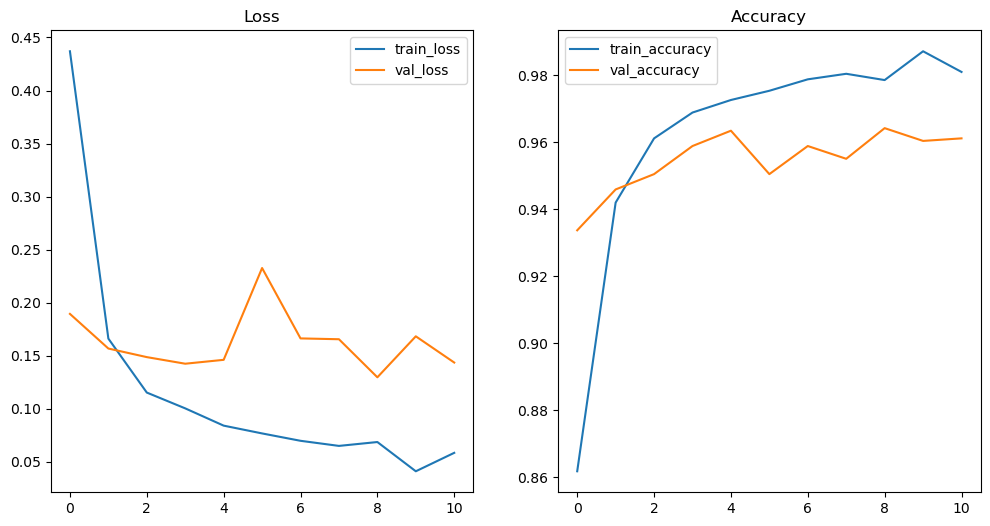

In [47]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history["loss"], label="train_loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.legend()
plt.title("Loss")

plt.subplot(1, 2, 2)
plt.plot(history.history["accuracy"], label="train_accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.legend()
plt.title("Accuracy")

plt.show()

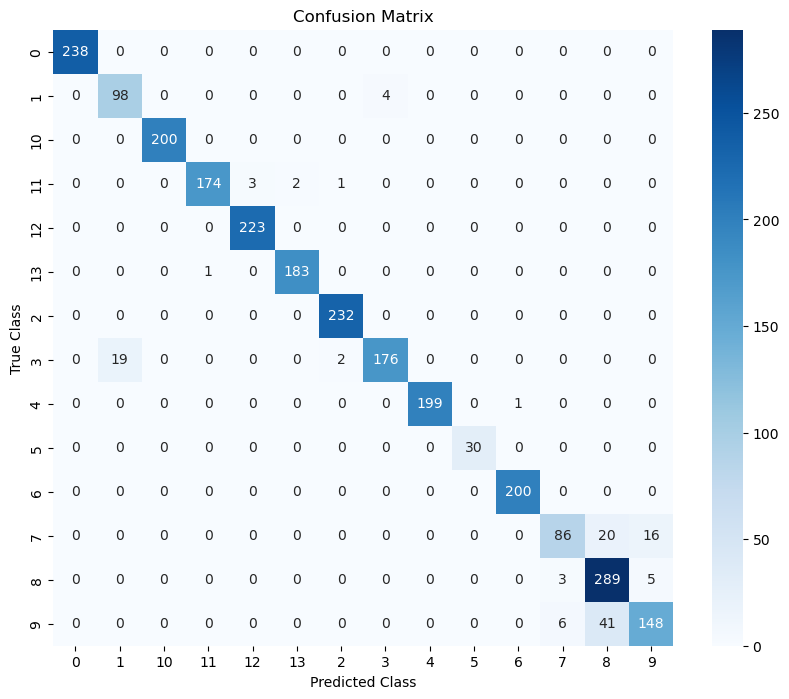

In [23]:
cm = confusion_matrix(generator_test.classes, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.title("Confusion Matrix")
plt.show()

In [25]:
image_path_show_X=[]
image_show_X=[]

class_image_path_show_X=[]
class_image_show_X=[]

# **Misclassify Images**

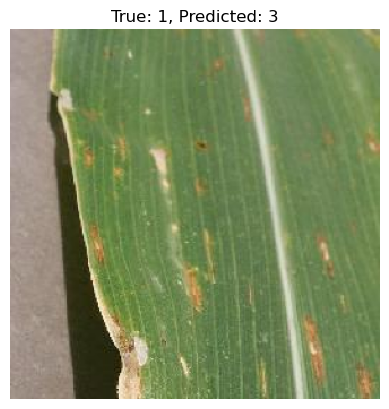

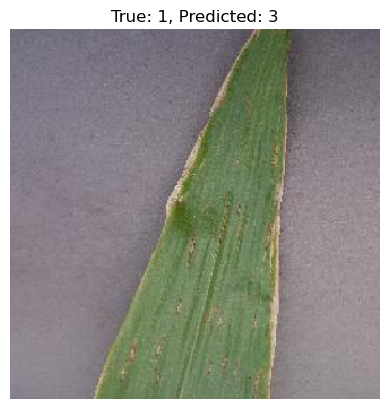

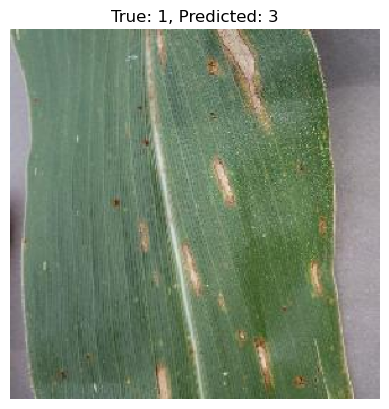

In [26]:
img_width, img_height= 299, 299
misclassified_images_X = []
for i in range(len(y_pred)):
    if y_pred[i] != generator_test.classes[i]:
        img_path = generator_test.filepaths[i]
        true_label = generator_test.classes[i]
        predicted_label = y_pred[i]
        misclassified_images_X.append((img_path, true_label, predicted_label))


num_display = 3
for img_path, true_label, predicted_label in misclassified_images_X[:num_display]:
    img = load_img(img_path, target_size=(img_width, img_height))
    plt.imshow(img)
    plt.title(f"True: {class_labels[true_label]}, Predicted: {class_labels[predicted_label]}")
    plt.axis('off')
    plt.show()
    
    image_path_show_X.append(img_path)
    image_show_X.append(img)

# **Correctly Classify Images**

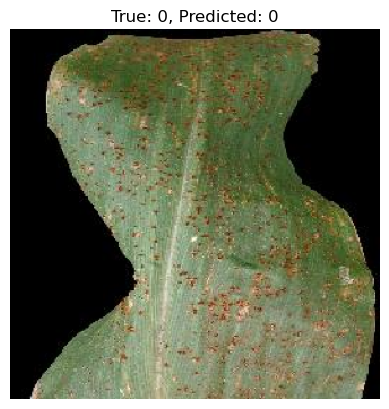

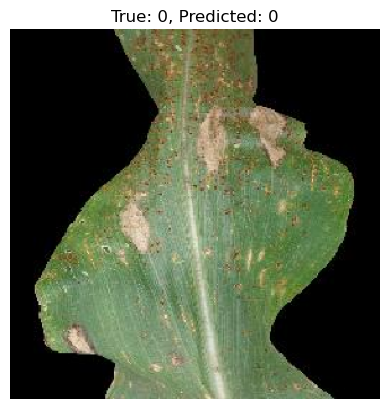

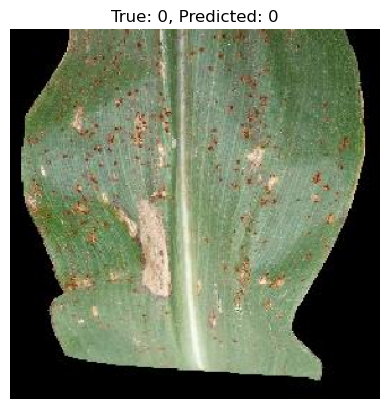

In [27]:
img_width, img_height= 299, 299
classified_images_X = []
for i in range(len(y_pred)):
    if y_pred[i] == generator_test.classes[i]:
        img_path = generator_test.filepaths[i]
        true_label = generator_test.classes[i]
        predicted_label = y_pred[i]
        classified_images_X.append((img_path, true_label, predicted_label))


num_display = 3
for img_path, true_label, predicted_label in classified_images_X[:num_display]:
    img = load_img(img_path, target_size=(img_width, img_height))
    plt.imshow(img)
    plt.title(f"True: {class_labels[true_label]}, Predicted: {class_labels[predicted_label]}")
    plt.axis('off')
    plt.show()
    
    class_image_path_show_X.append(img_path)
    class_image_show_X.append(img)

In [51]:
image_path_show_X
image_show_X

[<PIL.Image.Image image mode=RGB size=299x299>,
 <PIL.Image.Image image mode=RGB size=299x299>,
 <PIL.Image.Image image mode=RGB size=299x299>]

# **InceptionV3**

In [6]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [7]:
model2 = InceptionV3(include_top=False,input_shape=(228, 228, 3), weights='imagenet')

87910968/87910968 [==============================] - 0s 0us/step


In [8]:
input_shape= (228, 228)

In [11]:
datagen_train1 = ImageDataGenerator(rescale=1./255,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  vertical_flip=False)


datagen_test1 = ImageDataGenerator(rescale=1./255)
datagen_val1 = ImageDataGenerator(rescale=1./255)


generator_train1 = datagen_train1.flow_from_directory(directory=train_dir,
                                                    target_size=input_shape,
                                                    batch_size=batch_size,
                                                    shuffle=True)

generator_test1 = datagen_test1.flow_from_directory(directory=test_dir,
                                                  target_size=input_shape,
                                                  batch_size=batch_size,
                                                  shuffle=False)

generator_val1 = datagen_val1.flow_from_directory(directory=validation_dir,
                                                  target_size=input_shape,
                                                  batch_size=batch_size,
                                                  shuffle=False)


Found 9112 images belonging to 14 classes.
Found 2600 images belonging to 14 classes.
Found 1312 images belonging to 14 classes.


In [12]:
math.ceil(generator_train1.samples)

9112

In [13]:
next(generator_train1)[1]

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0

In [14]:
conv_model1 = Model(inputs=model2.input, outputs=model2.output)
new_model1 = Sequential()
new_model1.add(conv_model1)
new_model1.add(Flatten())
new_model1.add(Dropout(0.5))
new_model1.add(Dense(512, activation='relu'))
new_model1.add(Dense(14, activation='softmax'))

In [15]:
new_model1.compile(optimizer= opt, loss=loss, metrics=metrics)

In [16]:
num_iters = 30000
num_batches_train = generator_train1.n // batch_size

epochs = int(num_iters / num_batches_train)
print("Epoch: ",epochs)
desired_train_accuracy = 0.99

steps_per_epoch = generator_train1.n // batch_size
steps_val = generator_val1.n // batch_size
print("Steps_per_epoch: ",steps_per_epoch)
print("Steps_val: ",steps_val)

Epoch:  105
Steps_per_epoch:  284
Steps_val:  41


In [19]:
class DesiredAccuracyCallback(Callback):
    def __init__(self, desired_accuracy):
        super(DesiredAccuracyCallback, self).__init__()
        self.desired_accuracy = desired_accuracy

    def on_epoch_end(self, epoch, logs=None):
        if logs.get('accuracy') >= self.desired_accuracy:
            print(f"Desired training accuracy of {self.desired_accuracy*100:.2f}% reached. Stopping training.")
            self.model.stop_training = True

Checkpoint = ModelCheckpoint("inceptionV3.hdf5", monitor="val_accuracy", save_best_only=True, mode="max")
EarlyStop = EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True, mode="auto")
DesiredAccStop = DesiredAccuracyCallback(desired_train_accuracy)

history1 = new_model1.fit_generator(generator=generator_train1,
                                    epochs=epochs,
                                    callbacks=[Checkpoint, EarlyStop, DesiredAccStop],
                                    steps_per_epoch=steps_per_epoch,
                                    validation_data=generator_val1,
                                    validation_steps=steps_val)

/tmp/ipykernel_29/3953808750.py:15: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history1 = new_model1.fit_generator(generator=generator_train1,


Epoch 1/105
284/284 [==============================] - 361s 1s/step - loss: 0.5862 - accuracy: 0.8035 - val_loss: 0.3197 - val_accuracy: 0.8979
Epoch 2/105
284/284 [==============================] - 190s 668ms/step - loss: 0.2490 - accuracy: 0.9054 - val_loss: 0.2203 - val_accuracy: 0.9345
Epoch 3/105
284/284 [==============================] - 190s 669ms/step - loss: 0.1969 - accuracy: 0.9294 - val_loss: 0.1848 - val_accuracy: 0.9398
Epoch 4/105
284/284 [==============================] - 194s 683ms/step - loss: 0.1562 - accuracy: 0.9469 - val_loss: 0.2013 - val_accuracy: 0.9367
Epoch 5/105
284/284 [==============================] - 193s 681ms/step - loss: 0.1420 - accuracy: 0.9510 - val_loss: 0.1501 - val_accuracy: 0.9466
Epoch 6/105
284/284 [==============================] - 189s 666ms/step - loss: 0.1498 - accuracy: 0.9500 - val_loss: 0.2122 - val_accuracy: 0.9413
Epoch 7/105
284/284 [==============================] - 193s 679ms/step - loss: 0.1247 - accuracy: 0.9575 - val_loss: 0.18

In [20]:
new_model1=tf.keras.models.load_model('inceptionV3.hdf5')

In [21]:
Y_pred1 = new_model1.predict(generator_test1)
y_pred1 = np.argmax(Y_pred1, axis=1)

82/82 [==============================] - 45s 531ms/step


In [22]:
class_labels = list(generator_test1.class_indices.keys())

In [23]:
print(classification_report(generator_test1.classes, y_pred1, target_names=class_labels))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       238
           1       0.94      0.95      0.95       102
          10       1.00      1.00      1.00       200
          11       1.00      0.99      0.99       180
          12       1.00      1.00      1.00       223
          13       0.99      0.99      0.99       184
           2       0.99      1.00      1.00       232
           3       0.97      0.96      0.97       197
           4       1.00      1.00      1.00       200
           5       1.00      1.00      1.00        30
           6       1.00      1.00      1.00       200
           7       0.91      0.80      0.85       122
           8       0.88      0.97      0.92       297
           9       0.88      0.81      0.84       195

    accuracy                           0.97      2600
   macro avg       0.97      0.96      0.97      2600
weighted avg       0.97      0.97      0.97      2600



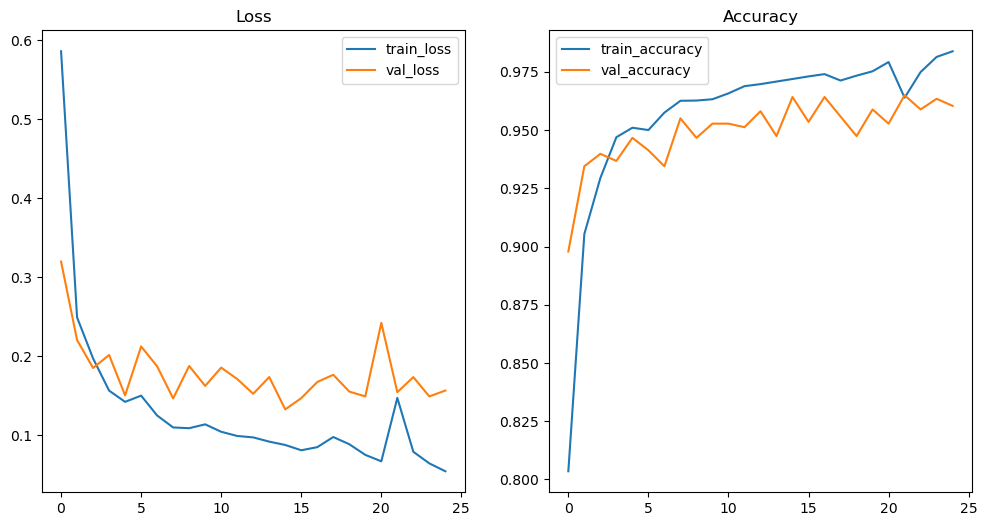

In [24]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history1.history["loss"], label="train_loss")
plt.plot(history1.history["val_loss"], label="val_loss")
plt.legend()
plt.title("Loss")

plt.subplot(1, 2, 2)
plt.plot(history1.history["accuracy"], label="train_accuracy")
plt.plot(history1.history["val_accuracy"], label="val_accuracy")
plt.legend()
plt.title("Accuracy")

plt.show()

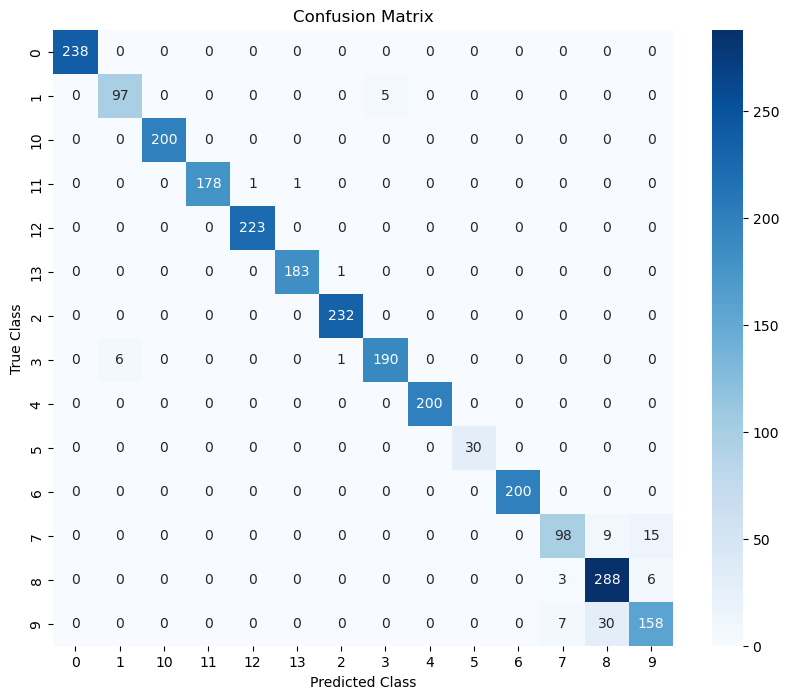

In [25]:
cm1 = confusion_matrix(generator_test1.classes, y_pred1)

plt.figure(figsize=(10, 8))
sns.heatmap(cm1, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.title("Confusion Matrix")
plt.show()

In [26]:
image_path_show_IN=[]
image_show_IN=[]

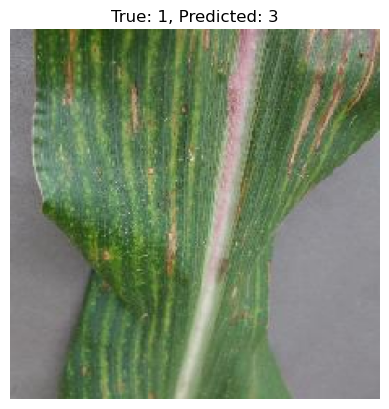

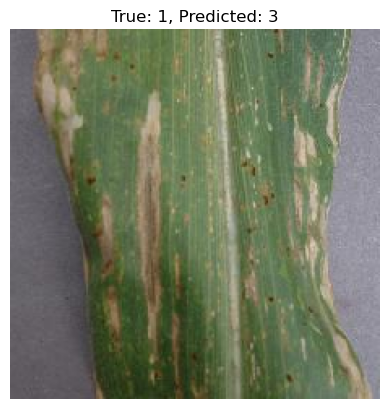

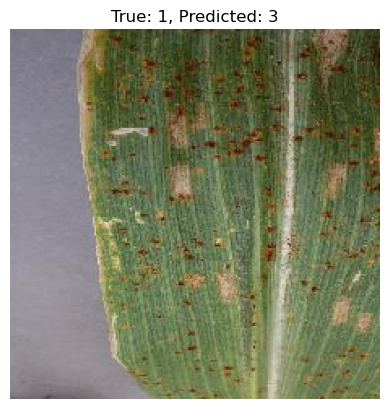

In [27]:
img_width, img_height= 228, 228
misclassified_images_IN = []
for i in range(len(y_pred1)):
    if y_pred1[i] != generator_test1.classes[i]:
        img_path = generator_test1.filepaths[i]
        true_label = generator_test1.classes[i]
        predicted_label = y_pred1[i]
        misclassified_images_IN.append((img_path, true_label, predicted_label))


num_display = 3
for img_path, true_label, predicted_label in misclassified_images_IN[:num_display]:
    img = load_img(img_path, target_size=(img_width, img_height))
    plt.imshow(img)
    plt.title(f"True: {class_labels[true_label]}, Predicted: {class_labels[predicted_label]}")
    plt.axis('off')
    plt.show()
    
    image_path_show_IN.append(img_path)
    image_show_IN.append(img)

# **VGG19**

In [1]:
from tensorflow.keras.applications.vgg19 import VGG19

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [2]:
model3 = VGG19(include_top=False,input_shape=(228, 228, 3), weights='imagenet')

80134624/80134624 [==============================] - 3s 0us/step


In [3]:
input_shape= (228, 228)

In [10]:
datagen_train2 = ImageDataGenerator(rescale=1./255,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  vertical_flip=False)


datagen_test2 = ImageDataGenerator(rescale=1./255)
datagen_val2 = ImageDataGenerator(rescale=1./255)


generator_train2 = datagen_train2.flow_from_directory(directory=train_dir,
                                                    target_size=input_shape,
                                                    batch_size=batch_size,
                                                    shuffle=True)

generator_test2 = datagen_test2.flow_from_directory(directory=test_dir,
                                                  target_size=input_shape,
                                                  batch_size=batch_size,
                                                  shuffle=False)

generator_val2 = datagen_val2.flow_from_directory(directory=validation_dir,
                                                  target_size=input_shape,
                                                  batch_size=batch_size,
                                                  shuffle=False)


Found 9112 images belonging to 14 classes.
Found 2600 images belonging to 14 classes.
Found 1312 images belonging to 14 classes.


In [11]:
math.ceil(generator_train2.samples)

9112

In [12]:
next(generator_train2)[1]

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0

In [14]:
conv_model2 = Model(inputs=model3.input, outputs=model3.output)
new_model2 = Sequential()
new_model2.add(conv_model2)
new_model2.add(Flatten())
new_model2.add(Dropout(0.5))
new_model2.add(Dense(512, activation='relu'))
new_model2.add(Dense(14, activation='softmax'))

In [15]:
new_model2.compile(optimizer= opt, loss=loss, metrics=metrics)

In [16]:
num_iters = 30000
num_batches_train = generator_train2.n // batch_size

epochs = int(num_iters / num_batches_train)
print("Epoch: ",epochs)
desired_train_accuracy = 0.99

steps_per_epoch = generator_train2.n // batch_size
steps_val = generator_val2.n // batch_size
print("Steps_per_epoch: ",steps_per_epoch)
print("Steps_val: ",steps_val)

Epoch:  105
Steps_per_epoch:  284
Steps_val:  41


In [17]:
class DesiredAccuracyCallback(Callback):
    def __init__(self, desired_accuracy):
        super(DesiredAccuracyCallback, self).__init__()
        self.desired_accuracy = desired_accuracy

    def on_epoch_end(self, epoch, logs=None):
        if logs.get('accuracy') >= self.desired_accuracy:
            print(f"Desired training accuracy of {self.desired_accuracy*100:.2f}% reached. Stopping training.")
            self.model.stop_training = True


Checkpoint = ModelCheckpoint("VGG19.hdf5", monitor="val_accuracy", save_best_only=True, mode="max")
DesiredAccStop = DesiredAccuracyCallback(desired_train_accuracy)
EarlyStop = EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True, mode="auto")


history2 = new_model2.fit_generator(generator=generator_train2,
                                    epochs=epochs,
                                    callbacks=[Checkpoint, DesiredAccStop, EarlyStop],
                                    steps_per_epoch=steps_per_epoch,
                                    validation_data=generator_val2,
                                    validation_steps=steps_val)

/tmp/ipykernel_28/1483698404.py:17: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history2 = new_model2.fit_generator(generator=generator_train2,


Epoch 1/105
284/284 [==============================] - 297s 974ms/step - loss: 0.8887 - accuracy: 0.6670 - val_loss: 0.4784 - val_accuracy: 0.8186
Epoch 2/105
284/284 [==============================] - 196s 689ms/step - loss: 0.4404 - accuracy: 0.8187 - val_loss: 0.4328 - val_accuracy: 0.8270
Epoch 3/105
284/284 [==============================] - 195s 686ms/step - loss: 0.4053 - accuracy: 0.8352 - val_loss: 0.5009 - val_accuracy: 0.7614
Epoch 4/105
284/284 [==============================] - 196s 690ms/step - loss: 0.3216 - accuracy: 0.8673 - val_loss: 0.2460 - val_accuracy: 0.8963
Epoch 5/105
284/284 [==============================] - 195s 687ms/step - loss: 0.2797 - accuracy: 0.8871 - val_loss: 0.3340 - val_accuracy: 0.8918
Epoch 6/105
284/284 [==============================] - 197s 693ms/step - loss: 0.2925 - accuracy: 0.8885 - val_loss: 0.2253 - val_accuracy: 0.9146
Epoch 7/105
284/284 [==============================] - 196s 689ms/step - loss: 0.2561 - accuracy: 0.9059 - val_loss: 0

In [18]:
new_model2=tf.keras.models.load_model('VGG19.hdf5')

In [20]:
Y_pred2 = new_model2.predict(generator_test2)
y_pred2 = np.argmax(Y_pred2, axis=1)

82/82 [==============================] - 44s 535ms/step


In [19]:
class_labels = list(generator_test2.class_indices.keys())

In [21]:
print(classification_report(generator_test2.classes, y_pred2, target_names=class_labels))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       238
           1       0.83      0.97      0.90       102
          10       0.97      0.99      0.98       200
          11       0.99      0.99      0.99       180
          12       0.96      1.00      0.98       223
          13       0.98      0.95      0.96       184
           2       1.00      0.99      0.99       232
           3       0.98      0.89      0.94       197
           4       1.00      0.99      1.00       200
           5       1.00      0.97      0.98        30
           6       0.99      1.00      0.99       200
           7       0.75      0.73      0.74       122
           8       0.83      0.96      0.89       297
           9       0.87      0.63      0.73       195

    accuracy                           0.94      2600
   macro avg       0.94      0.93      0.93      2600
weighted avg       0.94      0.94      0.94      2600



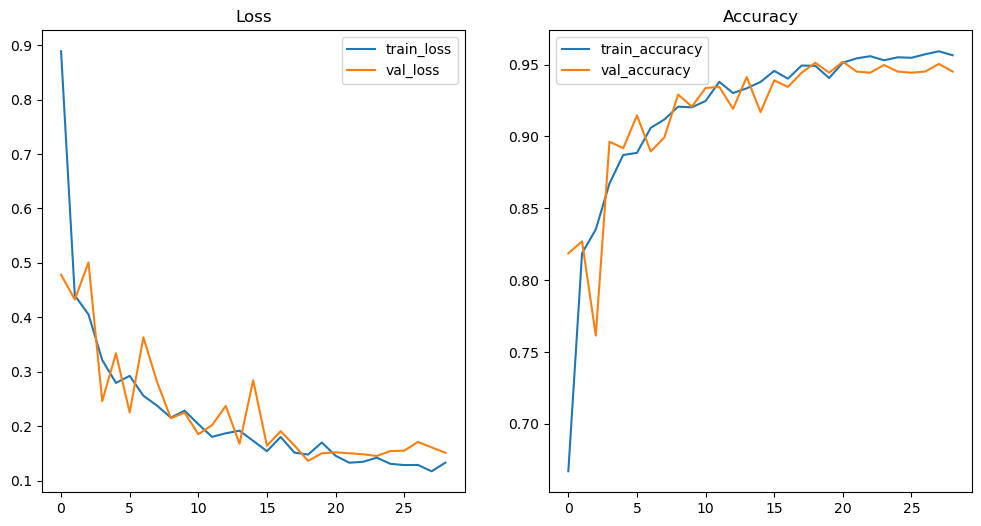

In [22]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history2.history["loss"], label="train_loss")
plt.plot(history2.history["val_loss"], label="val_loss")
plt.legend()
plt.title("Loss")

plt.subplot(1, 2, 2)
plt.plot(history2.history["accuracy"], label="train_accuracy")
plt.plot(history2.history["val_accuracy"], label="val_accuracy")
plt.legend()
plt.title("Accuracy")

plt.show()

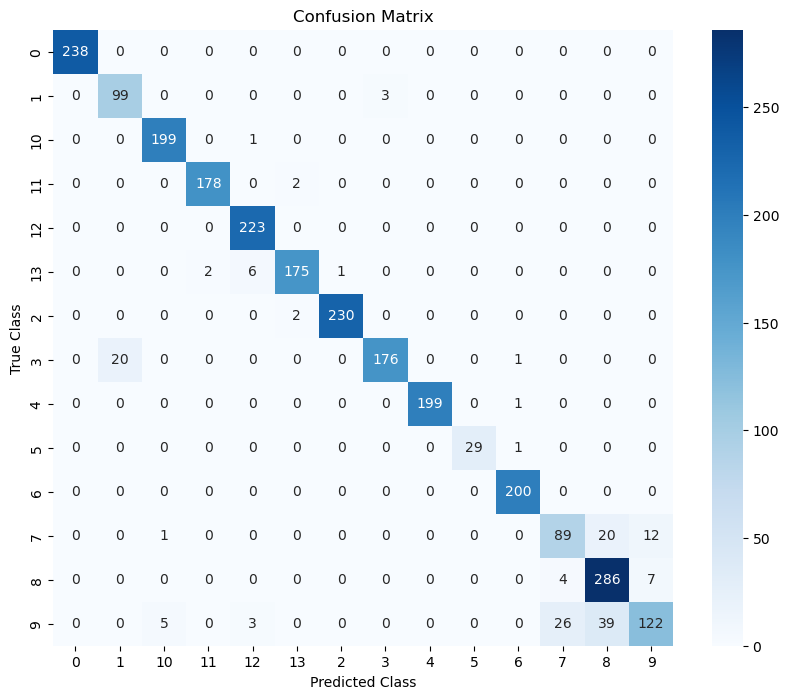

In [23]:
cm2 = confusion_matrix(generator_test2.classes, y_pred2)

plt.figure(figsize=(10, 8))
sns.heatmap(cm2, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.title("Confusion Matrix")
plt.show()

In [24]:
image_path_show_V=[]
image_show_V=[]

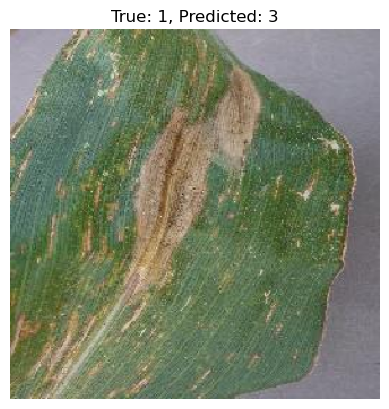

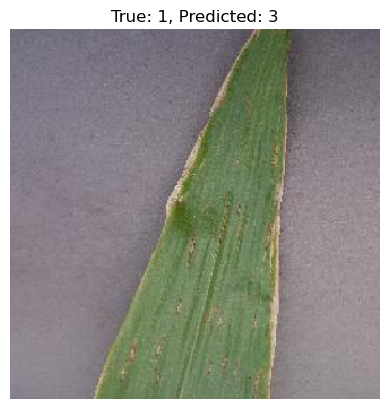

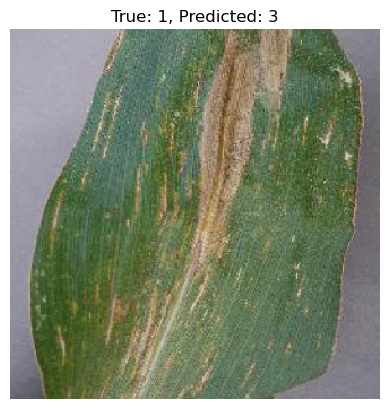

In [26]:
img_width, img_height= 299, 299
misclassified_images_V = []
for i in range(len(y_pred2)):
    if y_pred2[i] != generator_test2.classes[i]:
        img_path = generator_test2.filepaths[i]
        true_label = generator_test2.classes[i]
        predicted_label = y_pred2[i]
        misclassified_images_V.append((img_path, true_label, predicted_label))


num_display = 3
for img_path, true_label, predicted_label in misclassified_images_V[:num_display]:
    img = load_img(img_path, target_size=(img_width, img_height))
    plt.imshow(img)
    plt.title(f"True: {class_labels[true_label]}, Predicted: {class_labels[predicted_label]}")
    plt.axis('off')
    plt.show()
    
    image_path_show_V.append(img_path)
    image_show_V.append(img)

# **XAI**

In [28]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

from IPython.display import Image, display
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [29]:
model_builder = keras.applications.xception.Xception
img_size = (299, 299)
preprocess_input = keras.applications.xception.preprocess_input
decode_predictions = keras.applications.xception.decode_predictions

last_conv_layer_name = "block14_sepconv2_act"

In [31]:
def get_img_array(img_path, size):
    img = keras.utils.load_img(img_path, target_size=size)
    array = keras.utils.img_to_array(img)
    array = np.expand_dims(array, axis=0)
    return array


def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    grad_model = keras.models.Model(
        model.inputs, [model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    grads = tape.gradient(class_channel, last_conv_layer_output)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

# **Misclassify Images by VGG19**

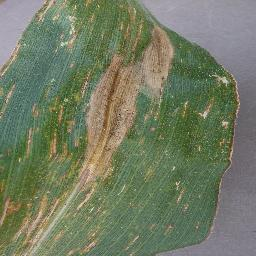

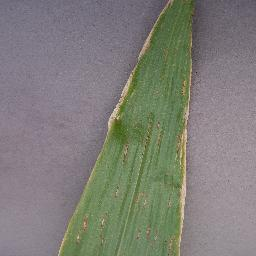

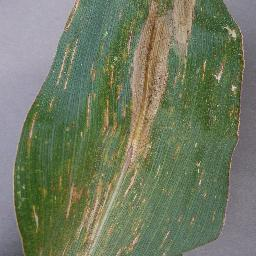

In [29]:
for path in image_path_show_V:
    img_path = path
    display(Image(img_path))

In [ ]:
heatmaps=[]

35363/35363 [==============================] - 0s 0us/step
Predicted: [('n07716358', 'zucchini', 6.282291)]


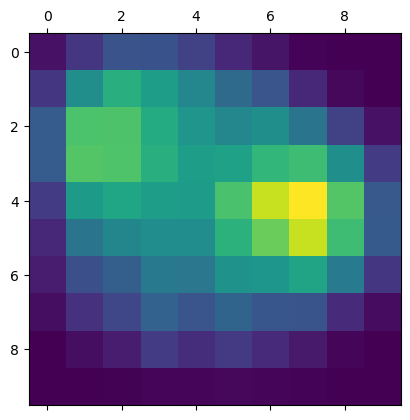

1/1 [==============================] - 1s 709ms/step
Predicted: [('n13133613', 'ear', 5.5592995)]


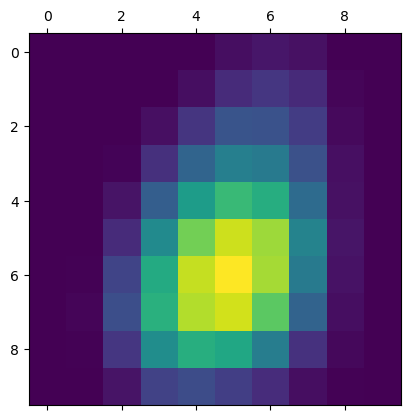

1/1 [==============================] - 1s 717ms/step
Predicted: [('n07716358', 'zucchini', 8.185873)]


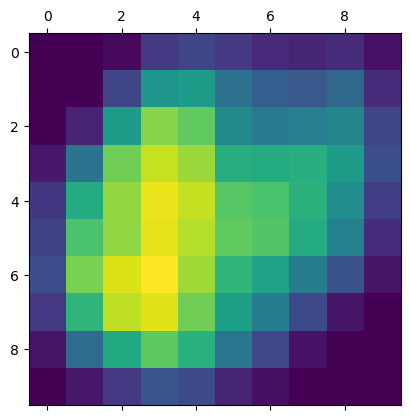

In [32]:
for img_path in image_path_show_V:
    img_array = preprocess_input(get_img_array(img_path, size=img_size))

    model = model_builder(weights="imagenet")
    model.layers[-1].activation = None

    preds = model.predict(img_array)
    print("Predicted:", decode_predictions(preds, top=1)[0])

    heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)
    heatmaps.append(heatmap)

    plt.matshow(heatmap)
    plt.show()

In [33]:
len(heatmaps)

3

/tmp/ipykernel_28/3325677642.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = cm.get_cmap("jet")


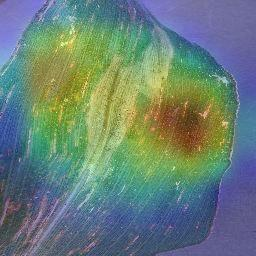

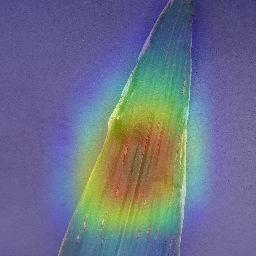

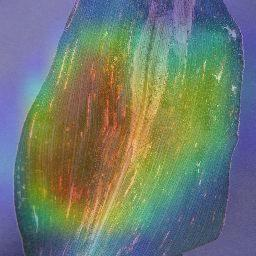

In [34]:
def save_and_display_gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.4):
    img = keras.utils.load_img(img_path)
    img = keras.utils.img_to_array(img)

    heatmap = np.uint8(255 * heatmap)
    jet = cm.get_cmap("jet")
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    jet_heatmap = keras.utils.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.utils.img_to_array(jet_heatmap)

    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.utils.array_to_img(superimposed_img)

    superimposed_img.save(cam_path)

    display(Image(cam_path))


for i in range(len(image_path_show_V)):
    img_path= image_path_show_V[i]
    heatmap= heatmaps[i]
    save_and_display_gradcam(img_path, heatmap)

# **Correctly Classify Image Prediction by Xception**

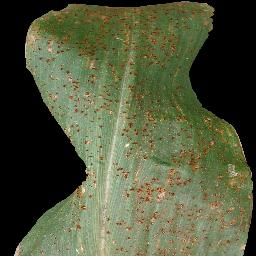

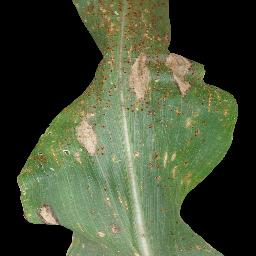

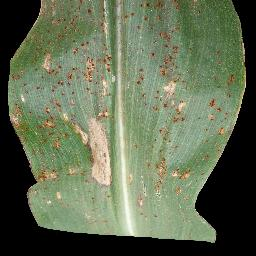

In [30]:
for path in class_image_path_show_X :
    img_path = path
    display(Image(img_path))

In [34]:
heatmapsX=[]

1/1 [==============================] - 1s 733ms/step
Predicted: [('n04522168', 'vase', 7.115751)]


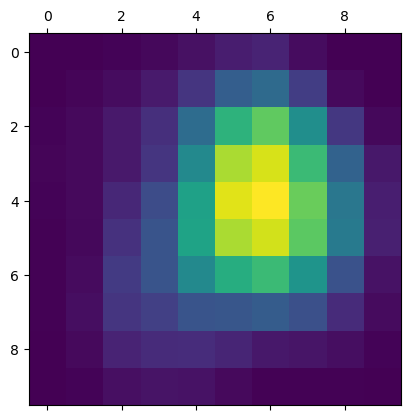

1/1 [==============================] - 1s 730ms/step
Predicted: [('n07714571', 'head_cabbage', 7.323025)]


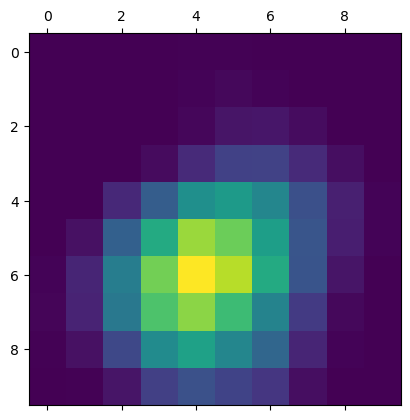

1/1 [==============================] - 1s 719ms/step
Predicted: [('n07714571', 'head_cabbage', 6.0350366)]


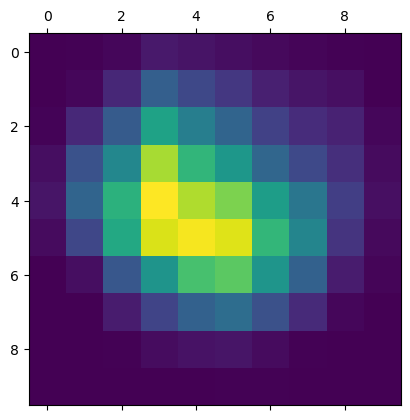

In [35]:
for img_path in class_image_path_show_X:
    img_array = preprocess_input(get_img_array(img_path, size=img_size))

    model = model_builder(weights="imagenet")
    model.layers[-1].activation = None

    preds = model.predict(img_array)
    print("Predicted:", decode_predictions(preds, top=1)[0])

    heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)
    heatmapsX.append(heatmap)

    plt.matshow(heatmap)
    plt.show()

/tmp/ipykernel_28/2000073127.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = cm.get_cmap("jet")


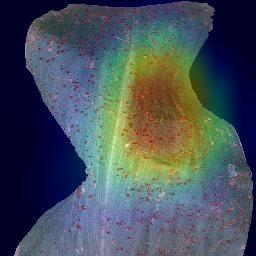

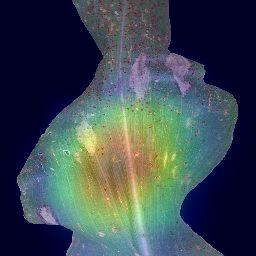

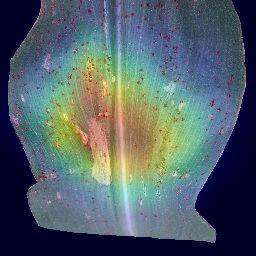

In [37]:
def save_and_display_gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.4):
    img = keras.utils.load_img(img_path)
    img = keras.utils.img_to_array(img)

    heatmap = np.uint8(255 * heatmap)
    jet = cm.get_cmap("jet")
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    jet_heatmap = keras.utils.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.utils.img_to_array(jet_heatmap)

    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.utils.array_to_img(superimposed_img)

    superimposed_img.save(cam_path)

    display(Image(cam_path))


for i in range(len(class_image_path_show_X)):
    img_path= class_image_path_show_X[i]
    heatmap= heatmapsX[i]
    save_and_display_gradcam(img_path, heatmap)